In [26]:
from PIL import Image
from pixelmatch.contrib.PIL import pixelmatch

In [27]:
img_a = Image.open("../data/original_data/ISIC-2017-Challange/ISIC_0000000.jpg")
img_b = Image.open("../data/duplicate_data/ISIC-2017/ISIC_0000000.jpg")
img_diff = Image.new("RGBA", img_a.size)

mismatch = pixelmatch(img_a, img_b, img_diff, includeAA=True)

img_diff.save("diff.png")

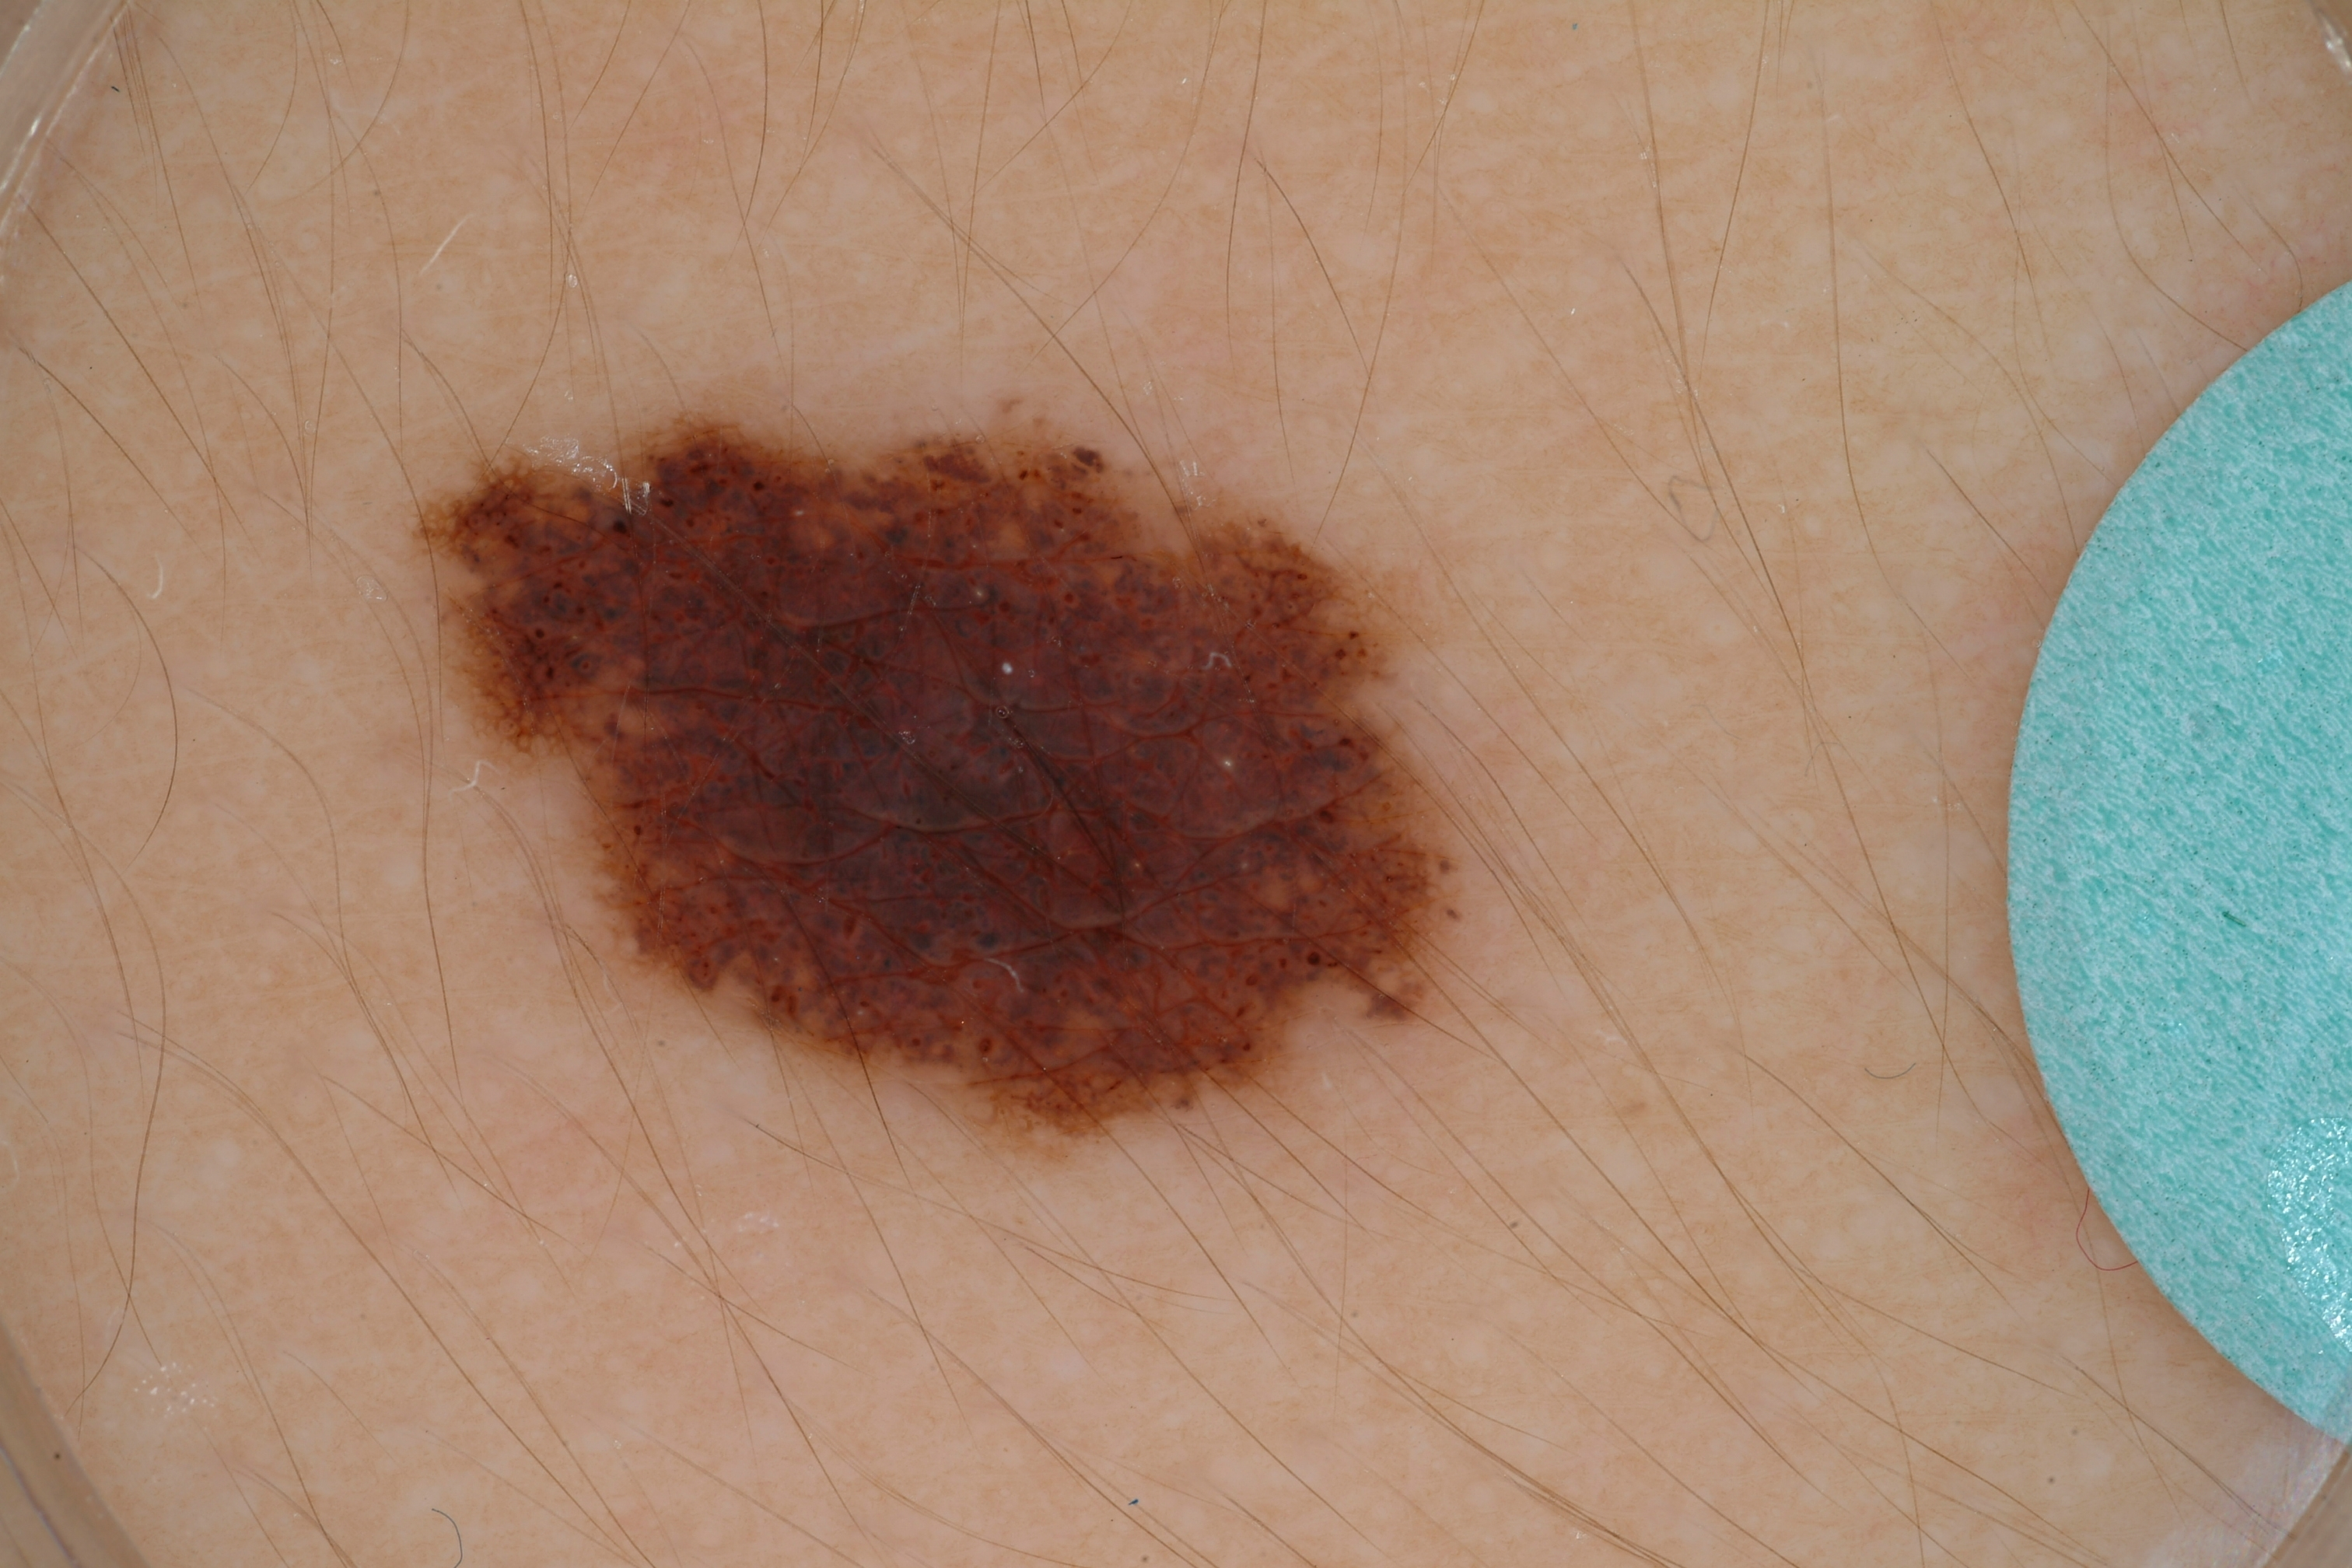

In [30]:
from IPython.display import Image

Image(filename='../data/original_data/ISIC-2017-Challange/ISIC_0003582.jpg') 